In [47]:
import requests
from bs4 import BeautifulSoup

In [48]:
url = "https://www.gutenberg.org/files/2701/2701-h/2701-h.htm"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.title.string)

Moby Dick; or The Whale


In [49]:
# Extracting all text

text = soup.get_text()
text[:1000]

'\n\n\n\nMoby Dick; or The Whale\n\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK 2701 ***\n\r\n      MOBY-DICK;or, THE WHALE.\r\n    \n\n\n\n\r\n      By Herman Melville\r\n    \n\n \n\n\n\n \n\n\n\nCONTENTS\n\n\n\n\n\n ETYMOLOGY. \n\n\n EXTRACTS (Supplied by a Sub-Sub-Librarian).\r\n        \n\n\n\n\n\n CHAPTER 1. Loomings. \n\n\n CHAPTER 2. The Carpet-Bag. \n\n\n CHAPTER 3. The Spouter-Inn. \n\n\n CHAPTER 4. The Counterpane. \n\n\n CHAPTER 5. Breakfast. \n\n\n CHAPTER 6. The Street. \n\n\n CHAPTER 7. The Chapel. \n\n\n CHAPTER 8. The Pulpit. \n\n\n CHAPTER 9. The Sermon. \n\n\n CHAPTER 10. A Bosom Friend. \n\n\n CHAPTER 11. Nightgown. \n\n\n CHAPTER 12. Biographical. \n\n\n CHAPTER 13. Wheelbarrow. \n\n\n CHAPTER 14. Nantucket. \n\n\n CHAPTER 15. Chowder. \n\n\n CHAPTER 16. The Ship. \n\n\n CHAPTER 17. The Ramadan. \n\n\n CHAPTER 18. His Mark. \n\n\n CHAPTER 19. The Prophet. \n\n\n CHAPTER 20. All Astir. \n\n\n CHAPTER 21. Going Aboard. \n\n\n CHAPTER 22. Merry Christmas. \n\n\n CHAP

In [50]:
# Extracting content only between START and END markers
start_marker = "*** START OF THIS PROJECT GUTENBERG EBOOK MOBY DICK ***"
end_marker = "*** END OF THIS PROJECT GUTENBERG EBOOK MOBY DICK ***"

start = text.find(start_marker)
end = text.find(end_marker)

book_text = text[start+len(start_marker):end]

In [51]:
# Converting to lower case

book_text = book_text.lower();

In [52]:
# Removing punctuation, keeping only letter and whitespace

import re

book_text = re.sub(r'[^a-z\s]', '', book_text)

In [53]:
# SPlitting into words

words = book_text.split()
words[:20]

['t',
 'gutenberg',
 'ebook',
 'mobydickor',
 'the',
 'whale',
 'by',
 'herman',
 'melville',
 'contents',
 'etymology',
 'extracts',
 'supplied',
 'by',
 'a',
 'subsublibrarian',
 'chapter',
 'loomings',
 'chapter',
 'the']

In [54]:
# Removing stop words

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

filtered_words[:25]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['gutenberg',
 'ebook',
 'mobydickor',
 'whale',
 'herman',
 'melville',
 'contents',
 'etymology',
 'extracts',
 'supplied',
 'subsublibrarian',
 'chapter',
 'loomings',
 'chapter',
 'carpetbag',
 'chapter',
 'spouterinn',
 'chapter',
 'counterpane',
 'chapter',
 'breakfast',
 'chapter',
 'street',
 'chapter',
 'chapel']

In [55]:
# Counting word frequencies

from collections import Counter
# import re

# Removing punctuation and lower case
# cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

#words = cleaned_text.split()

word_freq = Counter(filtered_words)
word_freq.most_common(20)

[('whale', 961),
 ('one', 891),
 ('like', 575),
 ('upon', 565),
 ('old', 440),
 ('man', 435),
 ('would', 427),
 ('ahab', 421),
 ('ye', 421),
 ('whales', 397),
 ('ship', 384),
 ('sea', 379),
 ('though', 364),
 ('yet', 339),
 ('time', 323),
 ('long', 315),
 ('chapter', 308),
 ('still', 307),
 ('great', 305),
 ('said', 294)]

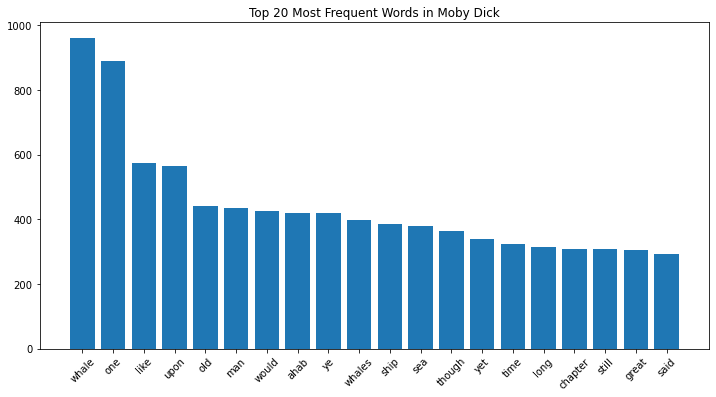

In [58]:
# Visualizing Top Words

import matplotlib.pyplot as plt

common = word_freq.most_common(20)
filtered_words, counts = zip(*common)

plt.figure(figsize=(12,6))
plt.bar(filtered_words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Moby Dick")
plt.show()

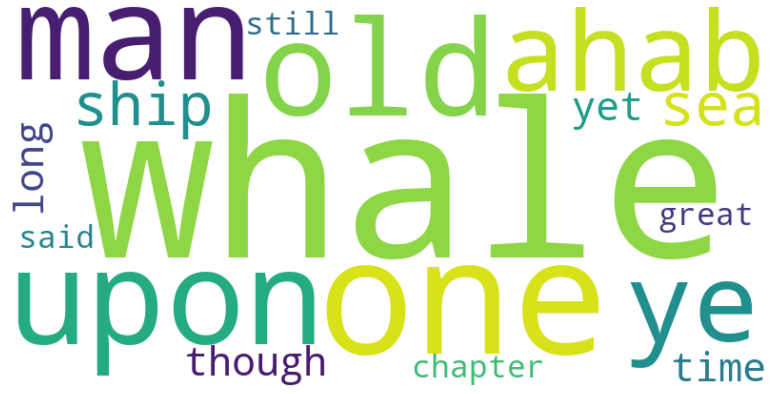

In [59]:
# Wordcloud view of the most common words 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Joining words into a single string
text_for_cloud = ' '.join(filtered_words)

# Generating WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_cloud)

# Displaying it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
